---

## 3η Εργασία <br> Αναγνώριση Προτύπων – Μηχανική Μάθηση <br/>Εαρινό Εξάμηνο 2020-2021


**Ροβιθάκης Ιωάννης - sdi1800164**

---

The following assignment is a small study of the way SVMs work and how PCA can affect and improve their performance

For any possible question that may arise during reading this notebook or for feedback, feel free to contact me at any time at: sdi1800164@di.uoa.gr

In [1]:
import time
import torch 
import torchvision 
import numpy as np
from sklearn import svm
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Data download and preparation

In [5]:
# We transform the data to tensors
transform = transforms.ToTensor()
# According to the sklearn documentation, toTensor() transform returns the data 'normalized'
# with values between 0 and 1 which is exactly what we need

# Download the train dataset
train_set = torchvision.datasets.MNIST(root = 'data', train = True, download = True, transform = transform)

# And the test dataset
test_set = torchvision.datasets.MNIST(root='data', train = False, download = True, transform = transform)


In [6]:
# Inspect the data a bit to ensure it is in the correct shape and form
for img in train_set:
  label = img[1]
  tensor = torch.flatten(img[0]).numpy()
  print(" Label:  ", label)
  print(" Tensor: ", tensor.shape)
  print(" Max:    ", np.max(tensor))
  print(" Min:    ", np.min(tensor))
  break

 Label:   5
 Tensor:  (784,)
 Max:     1.0
 Min:     0.0


In [7]:
# Extract the data in the format and type that we need it

# Splits the test data and label of the downloaded dataset to different lists
def split_data(dataset):
  data = []
  labels = []
  for img in dataset:
    # Also flatten the tensors to get them from [28x28] to [784] and turn them to arrays
    data.append( torch.flatten(img[0]).numpy() )
    labels.append( img[1] )

  return (data, labels)

train_data, train_labels = split_data(train_set)
test_data,  test_labels  = split_data(test_set)

In [8]:
# Ensure that indeed our vectors have values in [0,1]
def getMinMax(vectorlist):
  maxval = -1
  minval = 2
  for vec in vectorlist:
    maxval = max(maxval, max(vec))
    minval = min(minval, min(vec))
  print(" Max: %.2f, Min: %.2f" % (maxval, minval))
  return (maxval, minval)

getMinMax(train_data)
getMinMax(test_data);

 Max: 1.00, Min: 0.00
 Max: 1.00, Min: 0.00


We have ready the lists with our vectorized data in the needed dimentions and our data is indeed normalized in [0,1]. <br/> We can now move on with the classification tests

# SVM Classification tests

I Generally experimented with most of the parameters listed in the official sklearn docs and compared the results. I did not use automated testing methods like GridSearchCV since they took way too long to run. <br/>
(https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Due to time constraints, i did not test every single existing parameter combination, but in the end I consider the achieved performance both when it comes to time and accuracy good enough for the requirements of this assignment.

More comments on the results in the end

In [9]:
# Run a test for the given svm arguments
def svmTest(traindata, trainlabel, testdata, testlabel, kernel_type, C_val, gamma_val):
  print(" (i) Running test for: Kernel=%s, C=%f, gamma=%s" % (kernel_type,C_val,gamma_val))
  start = time.time()

  # Initialize the model with the given parameters
  model = svm.SVC(kernel=kernel_type, C=C_val, gamma=gamma_val)
  # Fit the traindata to the model
  model.fit(traindata, trainlabel)
  # And make a prediction based on the model and the testdata
  prediction = model.predict(testdata)

  # Print the resulting accuracy of the test
  print(' Accuracy: %.2f%%' % ( accuracy_score(testlabel, prediction)*100) )

  # Finally, plot the comfusion matrix for a better visualization
  plot_confusion_matrix(model, testdata, testlabel)  
  plt.show()
  # Also time the calculations for later decisions
  print(" (i) Test completed successfully in %f minutes\n" % ((time.time() - start)/60) )

I also print the confusion matrix as we learned in Data Mining, since it gives an interesting visualization of our results

#LinearSVC

Based on the Data Mining classes of this semester, i know that specifically for linear kernel SVM, LinearSVC() exists, that provides quite good accuracy performance and fast execution times compared to giving kernel='linear' to the general SVC(). The LinearSVC() classifier is implemented using a different library, hence its differentation from the base SVC classifier. So based on its good performance in a past assignment i decided to also test it here <br/>
(Source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [ ]:
# Run a test for the given Linear svm arguments
def svmLinearTest(traindata, trainlabel, testdata, testlabel, C_val, dual_val):
  print(" (i) Running test for: C=%.3f, dual=%d" % (C_val, dual_val))
  start = time.time()

  # Initialize the model with the given parameters
  model = svm.LinearSVC(C=C_val, dual=dual_val)
  # Fit the traindata to the model
  model.fit(traindata, trainlabel)
  # And make a prediction based on the model and the testdata
  prediction = model.predict(testdata)

  # Print the resulting accuracy of the test
  print(' Accuracy: %.2f%%' % ( accuracy_score(testlabel, prediction)*100) )

  # Finally, plot the comfusion matrix for a better visualization
  plot_confusion_matrix(model, testdata, testlabel)  
  plt.show()
  print(" (i) Test completed successfully in %f minutes\n" % ((time.time() - start)/60) )

 (i) Running test for: C=0.500, dual=0
 Accuracy: 91.85%


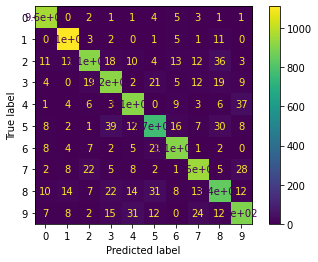

 (i) Test completed successfully in 0.806817 minutes

 (i) Running test for: C=0.500, dual=1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 Accuracy: 91.85%


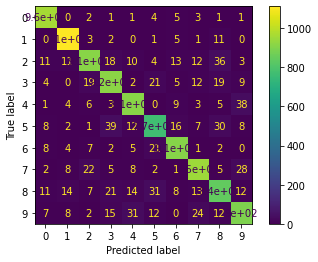

 (i) Test completed successfully in 1.928254 minutes

 (i) Running test for: C=1.000, dual=0
 Accuracy: 91.83%


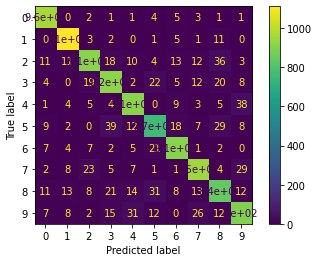

 (i) Test completed successfully in 0.983372 minutes

 (i) Running test for: C=1.000, dual=1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 Accuracy: 91.81%


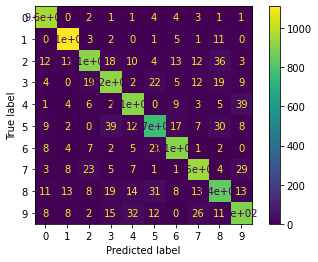

 (i) Test completed successfully in 2.423468 minutes

 (i) Running test for: C=10.000, dual=0
 Accuracy: 91.71%


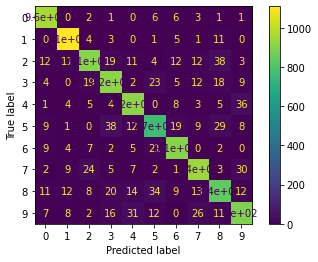

 (i) Test completed successfully in 2.434351 minutes

 (i) Running test for: C=10.000, dual=1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 Accuracy: 89.93%


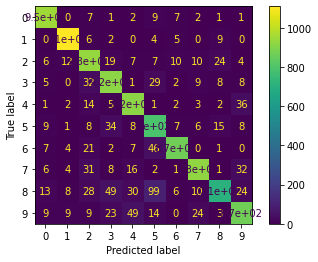

 (i) Test completed successfully in 3.983894 minutes

 (i) Running test for: C=15.000, dual=0
 Accuracy: 91.70%


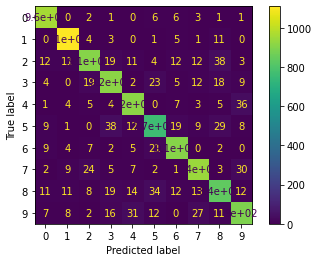

 (i) Test completed successfully in 2.543309 minutes

 (i) Running test for: C=15.000, dual=1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 Accuracy: 90.02%


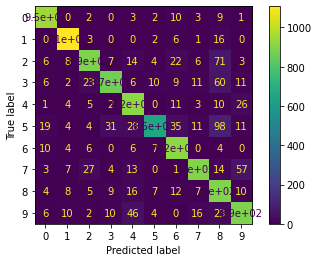

 (i) Test completed successfully in 3.901442 minutes



In [ ]:
# Test cases
test_C_vals = [0.5, 1, 10, 15]
test_dual   = [False, True]

for c in test_C_vals:
      for d in test_dual:
        svmLinearTest(train_data, train_labels, test_data, test_labels, c, d)

Although it is quite fast, it does not seem that accurate for this dataset

(I did not test the non-default values for 'penalty' and 'loss function' due to collisions with other args that interupted my automated tests)

# Linear kernel SVM

 (i) Running test for: Kernel=linear, C=1.000000, gamma=scale
 Accuracy: 94.04%


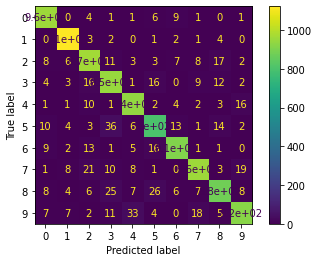

 (i) Test completed successfully in 12.679265 minutes

 (i) Running test for: Kernel=linear, C=10.000000, gamma=scale
 Accuracy: 93.11%


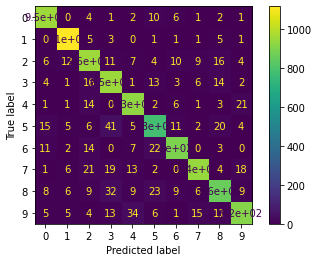

 (i) Test completed successfully in 16.890558 minutes

 (i) Running test for: Kernel=linear, C=15.000000, gamma=scale
 Accuracy: 92.98%


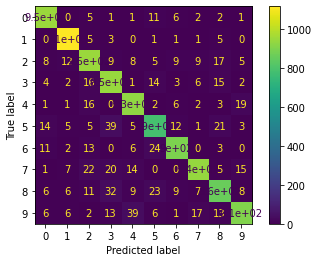

 (i) Test completed successfully in 18.641481 minutes



In [ ]:
# Test cases
test_kernels = ['linear']
test_C_vals  = [1, 10, 15]
test_gamma   = ['scale'] # Left gamma on default val - It does not effect the linear kernel

for k in test_kernels:
  for c in test_C_vals:
    for g in test_gamma:
      svmTest(train_data, train_labels, test_data, test_labels, k, c, g)

# RBF Kernel SVM

 (i) Running test for: Kernel=rbf, C=1.000000, gamma=scale
 Accuracy: 97.92%


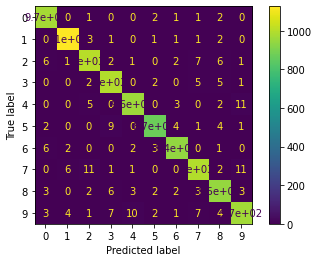

 (i) Test completed successfully in 13.393490 minutes

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.37%


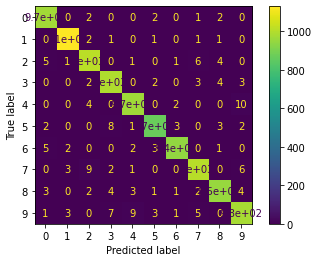

 (i) Test completed successfully in 12.288023 minutes

 (i) Running test for: Kernel=rbf, C=15.000000, gamma=scale
 Accuracy: 98.33%


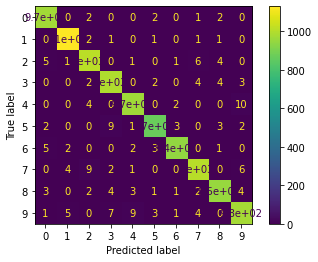

 (i) Test completed successfully in 12.348796 minutes



In [8]:
# Test cases
test_kernels = ['rbf']
test_C_vals  = [1, 10, 15]
test_gamma   = ['scale'] # Gamma = 'auto' caused slowdowns + achieved accuracy around ~93% so i removed it for better presentation

for k in test_kernels:
  for c in test_C_vals:
    for g in test_gamma:
      svmTest(train_data, train_labels, test_data, test_labels, k, c, g)

RBF kernel seems to be the most accurate one for C~=10 so i played around with the value of C to figure out if i can improve the accuracy any further

 (i) Running test for: Kernel=rbf, C=8.000000, gamma=scale
 Accuracy: 98.36%


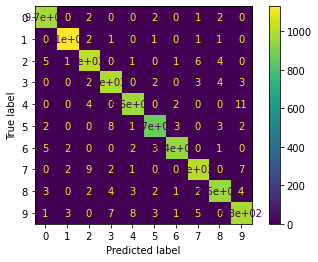

 (i) Test completed successfully in 12.277296 minutes

 (i) Running test for: Kernel=rbf, C=9.000000, gamma=scale
 Accuracy: 98.37%


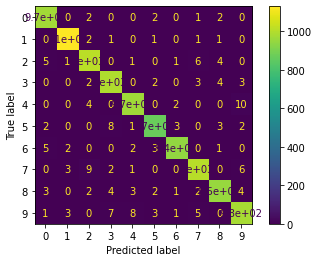

 (i) Test completed successfully in 12.291932 minutes

 (i) Running test for: Kernel=rbf, C=11.000000, gamma=scale
 Accuracy: 98.37%


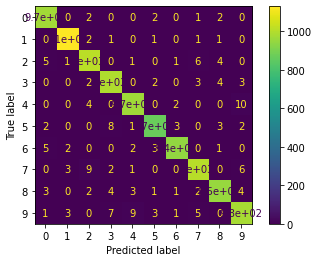

 (i) Test completed successfully in 12.307317 minutes

 (i) Running test for: Kernel=rbf, C=12.000000, gamma=scale
 Accuracy: 98.37%


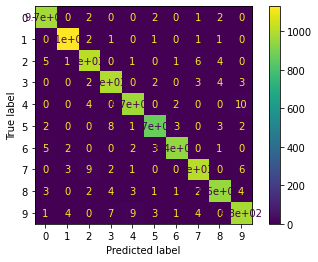

 (i) Test completed successfully in 12.308799 minutes



In [8]:
# Test cases
test_kernels = ['rbf']
test_C_vals  = [8, 9, 11, 12] # I tried values around 10 to see if any improvements can be achieved
test_gamma   = ['scale']

for k in test_kernels:
  for c in test_C_vals:
    for g in test_gamma:
      svmTest(train_data, train_labels, test_data, test_labels, k, c, g)

This test did not seem to yield any improvements, so our "optimal" parameters remain the same

# Poly Kernel SVM

 (i) Running test for: Kernel=poly, C=1.000000, gamma=scale
 Accuracy: 97.71%


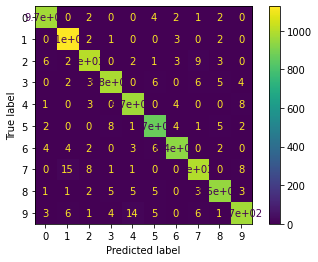

 (i) Test completed successfully in 12.617138 minutes

 (i) Running test for: Kernel=poly, C=10.000000, gamma=scale
 Accuracy: 97.86%


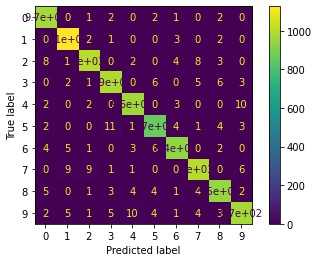

 (i) Test completed successfully in 9.209663 minutes



In [9]:
# Test cases
test_kernels = ['poly']
test_C_vals  = [1, 10]
test_gamma   = ['scale'] # Gamma = 'auto' caused really long execution times (1hour+ per case)

for k in test_kernels:
  for c in test_C_vals:
    for g in test_gamma:
      svmTest(train_data, train_labels, test_data, test_labels, k, c, g)

(Due to time constraints, i did not experiment with the degree parameter of poly kernel)

# Sigmoid Kernel SVM

 (i) Running test for: Kernel=sigmoid, C=1.000000, gamma=scale
 Accuracy: 77.59%


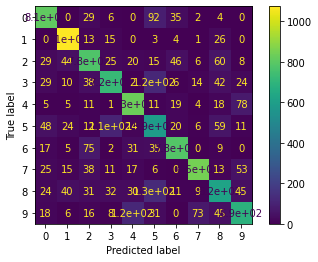

 (i) Test completed successfully in 21.807811 minutes

 (i) Running test for: Kernel=sigmoid, C=10.000000, gamma=scale
 Accuracy: 76.72%


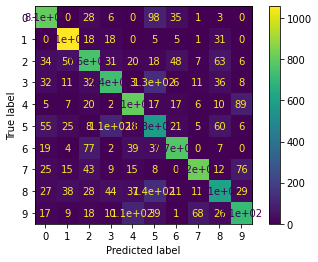

 (i) Test completed successfully in 18.597973 minutes



In [7]:
# Test cases
test_kernels = ['sigmoid']
test_C_vals  = [1, 10]
test_gamma   = ['scale'] # Also here, Gamma = 'auto' caused really long execution times 

for k in test_kernels:
  for c in test_C_vals:
    for g in test_gamma:
      svmTest(train_data, train_labels, test_data, test_labels, k, c, g)

Sigmoid's performance was quite bad

# Results

In general, between all the tested combinations, the rbf kernel seems to achieve the best overal accuracy with 98.37%, while LinearSVC provides the best accuracy for the execution time result
91.85% in just 0.8 of a minute for training.

It is possible that there is some parameter combination that yields even better results, but 98.37% is already great for our usecase and I don't have more time to test other combinations.

I will move on to the next part of the assignment using the rbf kernel for its great accuracy.

# PCA

Since we want to find/use the principal components of this dataset that have the largest effect on our results (store more information - largest variation), it is a good idea to start by ploting their variance. This will help us to decide how many components we need for our usecase - how much information do we need to retain.

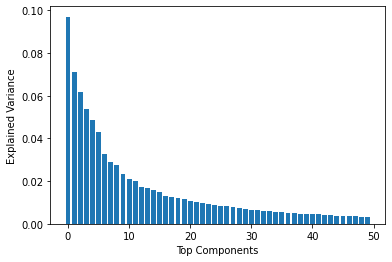

In [7]:
# We will plot the variance of the top 50 components of the train data
component_amount = 50

# Train the model to get the explained variance 
pca = PCA(n_components=component_amount, whiten=True).fit(train_data)

plt.bar(range(component_amount), pca.explained_variance_ratio_[:component_amount])
plt.xlabel('Top Components')
plt.ylabel('Explained Variance');

It is also a good idea to print the cumulative variance to see how much variance is added with each component added 

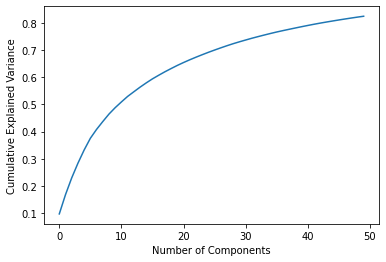

In [8]:
# We cumulatively sum the component's variance to visualize it
cumVar = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumVar)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

We can see that by using only 50 components we manage to retain ~80% of the total information

Also with just 10 components we retain ~50% of the total information

The observations above were expected, since we can clearly see the logarithmic characteristics of the plotted cumulative variance  

# PCA Tests

In [11]:
# Run a test for the given component amount, using the 'optimal' parameters for SVC found through the tests above
def PCA_SVC_test(traindata, trainlabel, testdata, testlabel, components):
  print(" (i) Testing PCA-SVC with Component amount=%d \n" % (components))
  start = time.time()

  # Create the pca model and fit ONLY the train data to it
  pca = PCA(n_components=components, whiten=True).fit(traindata)

  # Use the created model to transform both the train and test data,
  # to bring everything to the same amount of components and allow svc to work
  traindata_pca = pca.transform(traindata)
  testdata_pca  = pca.transform(testdata)

  # Run a test using the 'optimal' SVC parameters we found
  svmTest(traindata_pca, train_labels, testdata_pca, test_labels, 'rbf', 10, 'scale')

  print(" (i) PCA-SVC Test completed successfully in %f minutes" % ((time.time() - start)/60) )
  print("____________________________________________________________________________\n\n")


I know that we only needed to run 3 tests but i was curious so i tested more component amount cases

 (i) Testing PCA-SVC with Component amount=10 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 94.27%


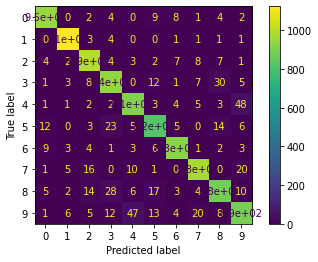

 (i) Test completed successfully in 0.487031 minutes

 (i) PCA-SVC Test completed successfully in 0.558474 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=20 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 97.87%


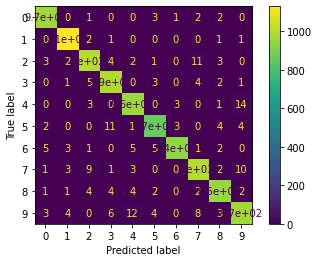

 (i) Test completed successfully in 0.550828 minutes

 (i) PCA-SVC Test completed successfully in 0.634099 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=30 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.35%


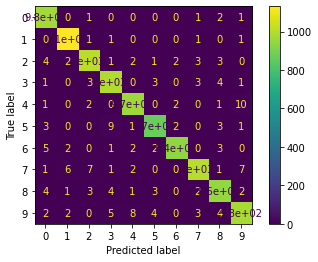

 (i) Test completed successfully in 0.811460 minutes

 (i) PCA-SVC Test completed successfully in 0.893304 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=40 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.49%


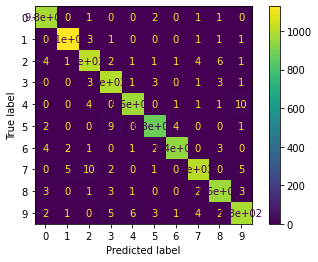

 (i) Test completed successfully in 1.140814 minutes

 (i) PCA-SVC Test completed successfully in 1.231577 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=45 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.52%


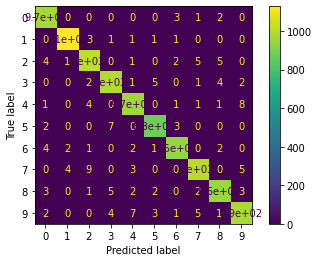

 (i) Test completed successfully in 1.336312 minutes

 (i) PCA-SVC Test completed successfully in 1.434985 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=50 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.52%


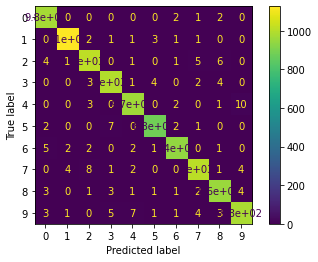

 (i) Test completed successfully in 1.544935 minutes

 (i) PCA-SVC Test completed successfully in 1.647834 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=55 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.54%


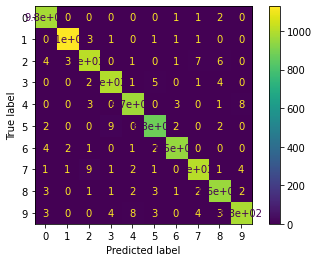

 (i) Test completed successfully in 1.754591 minutes

 (i) PCA-SVC Test completed successfully in 1.854587 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=60 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.42%


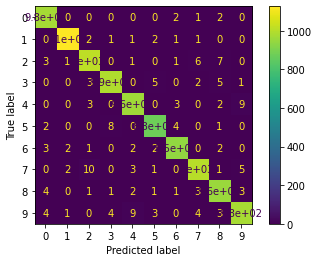

 (i) Test completed successfully in 1.975719 minutes

 (i) PCA-SVC Test completed successfully in 2.085564 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=100 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.19%


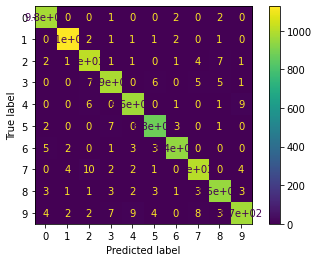

 (i) Test completed successfully in 4.042414 minutes

 (i) PCA-SVC Test completed successfully in 4.146658 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=200 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 97.44%


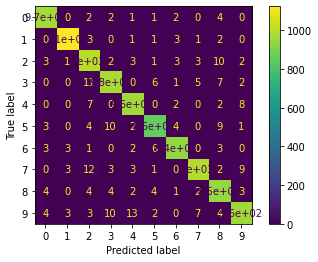

 (i) Test completed successfully in 10.919569 minutes

 (i) PCA-SVC Test completed successfully in 11.079814 minutes
____________________________________________________________________________




In [9]:
# Test Cases
component_amounts = [10, 20, 30, 40, 45, 50, 55, 60, 100, 200]

for comp in component_amounts:
  PCA_SVC_test(train_data, train_labels, test_data, test_labels, comp)

Around 50 components we seem to hit the max accuracy so i tried to find it

 (i) Testing PCA-SVC with Component amount=51 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.56%


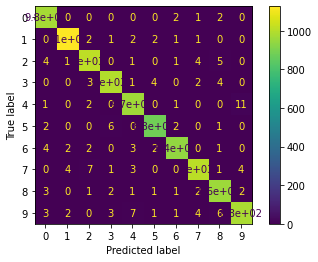

 (i) Test completed successfully in 1.603613 minutes

 (i) PCA-SVC Test completed successfully in 1.711868 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=52 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.62%


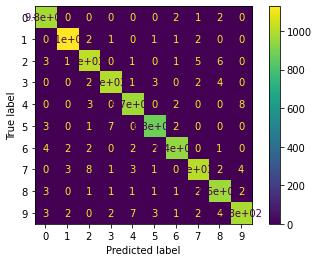

 (i) Test completed successfully in 1.642852 minutes

 (i) PCA-SVC Test completed successfully in 1.752033 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=53 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.45%


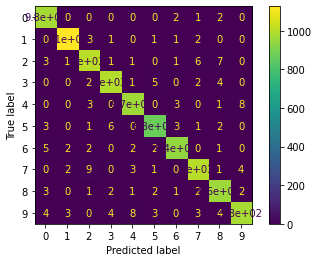

 (i) Test completed successfully in 1.685713 minutes

 (i) PCA-SVC Test completed successfully in 1.791149 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=54 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.52%


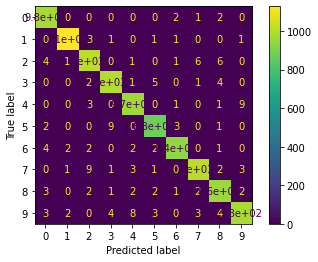

 (i) Test completed successfully in 1.732495 minutes

 (i) PCA-SVC Test completed successfully in 1.830825 minutes
____________________________________________________________________________


 (i) Testing PCA-SVC with Component amount=56 

 (i) Running test for: Kernel=rbf, C=10.000000, gamma=scale
 Accuracy: 98.57%


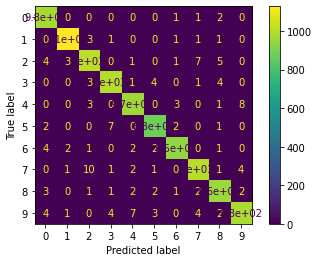

 (i) Test completed successfully in 1.815955 minutes

 (i) PCA-SVC Test completed successfully in 1.917921 minutes
____________________________________________________________________________




In [10]:
# Test Cases
component_amounts = [51, 52, 53, 54, 56]

for comp in component_amounts:
  PCA_SVC_test(train_data, train_labels, test_data, test_labels, comp)

# Conclusions

The most interesting results from the PCA tests above can be summed up in the table below:

| Amount of Components | Accuracy | Elapsed Time |
|----------------------|----------|--------------|
|  10 | 94.27% | 0.48  min |
|  20 | 97.87% | 0.63  min |
|  30 | 98.35% | 0.81  min |
|  45 | 98.52% | 1.43  min |
|  52 | 98.62% | 1.75  min |
|  60 | 98.42% | 1.97  min |
| 100 | 98.19% | 4.14  min |
| 200 | 97.44% | 11.07 min |

Max accuracy achieved using: 
- **Component Amount** = 52
- **Max Accuracy** = 98.62**%**
- **Elapsed Time** = 1.75 **min** 

Plot the test results for a better visualization

In [11]:
Components = [10,    20,    30,    45,    52,    60,    100,   200  ]
Accuracies = [94.27, 97.87, 98.35, 98.52, 98.62, 98.42, 98.19, 97.44]
Elapsed    = [0.48,  0.63,  0.81,  1.43,  1.75,  1.97,  4.14,  11.07]

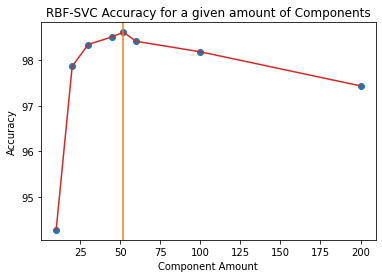

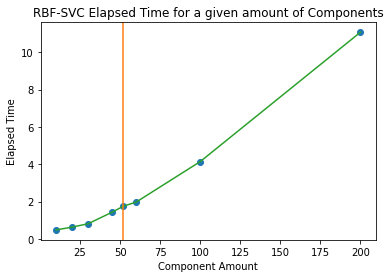

In [27]:
plt.plot(Components, Accuracies, color='tab:red')
plt.scatter(Components, Accuracies, color='tab:blue')
plt.axvline(52, 0, 100, color='tab:orange')
plt.title('RBF-SVC Accuracy for a given amount of Components')
plt.ylabel('Accuracy')
plt.xlabel('Component Amount')
plt.show()
print()

plt.plot(Components, Elapsed, color='tab:green')
plt.scatter(Components, Elapsed, color='tab:blue')
plt.axvline(52, 0, 15, color='tab:orange')
plt.title('RBF-SVC Elapsed Time for a given amount of Components')
plt.ylabel('Elapsed Time')
plt.xlabel('Component Amount')
plt.show()

**In the end:**
- For the best possible accuracy **(98.62%)** we must use **52 components** (Time = **1.75 min**)
- A really fast and usable accuracy **(94.27%)** is achieved using only **10 components** in just **0.48 of a minute**.
- In my opinion a good 'middle ground' option is to go with **30 components** **(98.35%)**. This achieves almost the same accuracy with the 52 components **(Only -0.27%)** while needing ~half the time to run (Time = **0.81 min**).

Once again, for any question, explanation or feedback, feel free to contact me